In [204]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import draw,bar
import random as rand
import math
from scipy.stats import multivariate_normal

In [7]:
def scale(oldValue,oldMax,oldMin,newMax,newMin):
    oldRange = (oldMax - oldMin)  
    newRange = (newMax - newMin)  
    newValue = (((oldValue - oldMin) * newRange) / oldRange) + newMin
    return newValue

# Uniform distribution Sampling

In [65]:
def uniform (min1, max1, sample_size):
    arr=[]
    for i in range(1,sample_size):
        num = scale(rand.random(),1,0,max1,min1)

        arr.append(num)

        
    plt.hist(arr, bins=10)
    plt.ylabel('Frequency')
    plt.xlabel('Samples')
    plt.title('Histogram')

    plt.show()

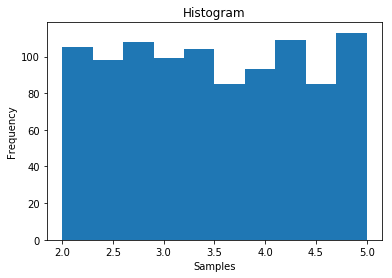

In [66]:
uniform(2,5,1000)

# 1D Gaussian Sampling

In [13]:
def gaussian_formula(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [85]:
def Gaussian(mu, sigma, sample_size):
    count = 0 
    samples=[]
    
    while (len(samples) < sample_size):
        x = scale(rand.random(),1,0,mu-3*sigma, mu+3*sigma)
        y = rand.random()

        # Do the accept/reject comparison
        if y < gaussian_formula(x,mu,sigma):
            samples.append(x)
        count +=1
        
        
    print "Number of trials: ",count
    
    hinfo = np.histogram(samples,30)
    plt.hist(samples,bins=30);

    # plot our (normalized) function
    xvals=np.linspace(mu-3*sigma, mu+3*sigma, sample_size)
    plt.plot(xvals, max(hinfo[0])*gaussian_formula(xvals,mu,sigma), 'r')
    plt.ylabel('Frequency')
    plt.xlabel('Samples')
    plt.title('Histogram')
    plt.legend()
    plt.show()
    

Number of trials:  24388


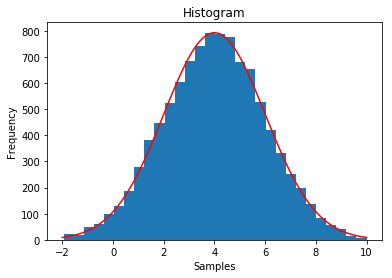

In [86]:
Gaussian(4,2,10000)

# 2D Gaussian Sampling

In [80]:
#def gaussian_2d(x, y, x0, y0, xsig, ysig):
#    return 1/(2*np.pi*xsig*ysig) * np.exp(-0.5*(((x-x0) / xsig)**2 + ((y-y0) / ysig)**2))

In [181]:
def Gaussian2D(mu,cov, sample_size):
    count = 0 
    xs=[]
    ys=[]
    
    x0=mu[0]
    y0=mu[1]
    xsig=math.sqrt(cov[0][0])
    ysig=math.sqrt(cov[1][1])
    while (len(xs) < sample_size):
        x = scale(rand.random(),1,0,x0-3*xsig, x0+3*xsig)
        y = scale(rand.random(),1,0,y0-3*ysig, y0+3*ysig)
        
        z=rand.random()
        
        # Do the accept/reject comparison
        if z < multivariate_normal.pdf([x,y], mu,cov):
            xs.append(x)
            ys.append(y)
        count +=1
        
        
    print "Number of trials: ",count
    
    plt.scatter(xs, ys,marker="x")
    plt.axis('equal')
    plt.show()
    

Number of trials:  41835


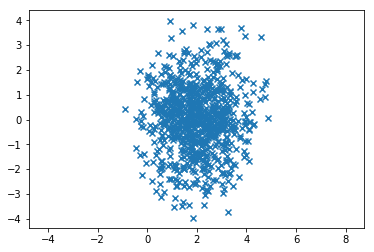

In [188]:
mu=[2,0]
cov = [[1,0],[0,2]]
Gaussian2D(mu,cov,800)

# Stevens Method: wihtout-replacement sampling from a discrete non-uniform distribution

In [293]:
def nudsampling(M=300,N=20):
    samp_prob=[]
    for i in range(0,300):
        samp_prob.append(i/300.0)
    samp_prob=sorted([float(i)/sum(samp_prob) for i in samp_prob],reverse=True)
    
    bins={}

    for i in range(300/20):
        temp=[]
        for j in range(20):
            temp.append(samp_prob[20*i+j])
        bins[i]=temp
        
    
    updatedbins={}

    for i in bins:
        temp=[sum(bins[i])/len(bins[i])]*len(bins[i])
        updatedbins[i]=temp
        
    
    bucketprobs=[]
    for i in updatedbins:
        bucketprobs.append(sum(updatedbins[i]))
        
    for i in range(1,len(bucketprobs)):
        bucketprobs[i]=bucketprobs[i]+bucketprobs[i-1]
        
    
    bucketsampling={}
    for i in range(15):
        bucketsampling[i]=0

    for i in range(20):
        ri=rand.random()

        if 0<=ri<bucketprobs[0]:
            bucketsampling[0]+=1

        else:
            for j in range(0,len(bucketprobs)-1):
                if bucketprobs[j]<=ri<bucketprobs[j+1]:
                    bucketsampling[j+1]+=1

            if bucketprobs[len(bucketprobs)-1]<=ri<=1:
                bucketsampling[j+1]+=1
    
    print "bucket sampling:",bucketsampling
    
    sampledindexes=[]
    for i in bucketsampling:
        indexes = range(i*20,i*20+20)
        rand.shuffle(indexes)
        
        for k in indexes[:bucketsampling[i]]:
            sampledindexes.append(k)
    
    print "sampled indexes:",sampledindexes

In [294]:
nudsampling()

bucket sampling: {0: 4, 1: 1, 2: 3, 3: 2, 4: 1, 5: 1, 6: 3, 7: 0, 8: 0, 9: 3, 10: 1, 11: 0, 12: 1, 13: 0, 14: 0}
sampled indexes: [15, 10, 0, 13, 30, 46, 40, 41, 75, 77, 82, 112, 139, 129, 138, 191, 184, 189, 210, 255]


# Gibbs Sampling

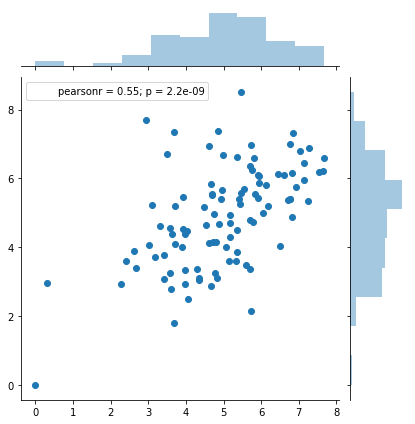

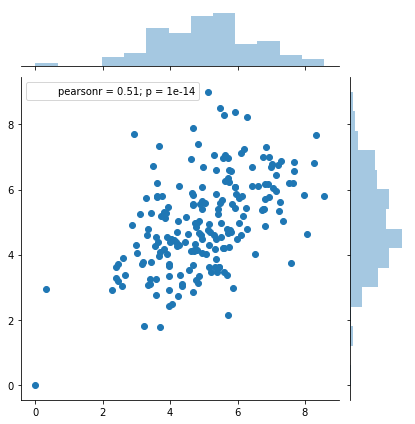

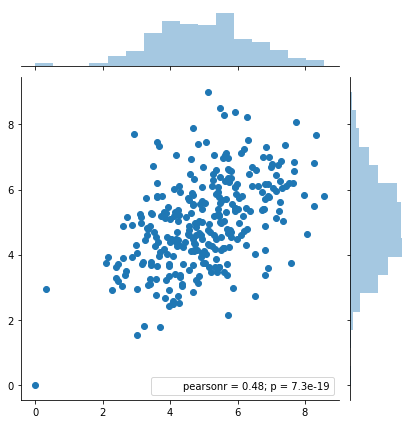

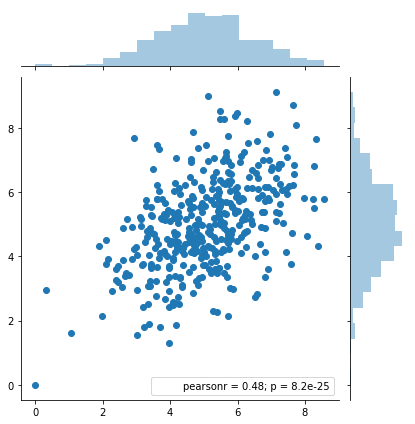

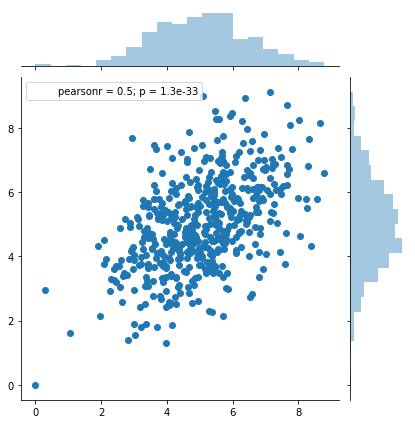

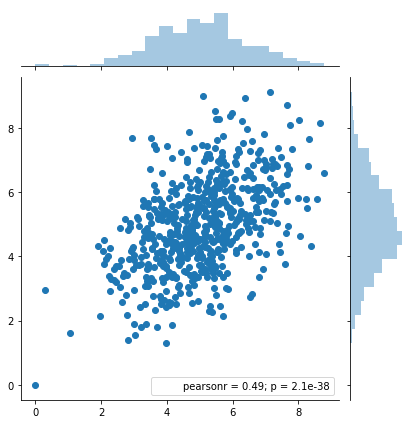

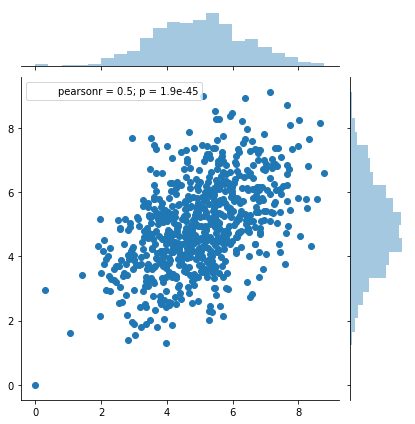

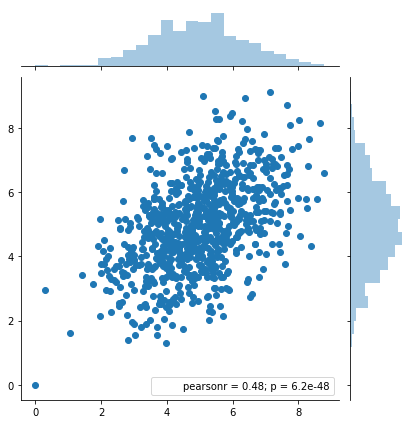

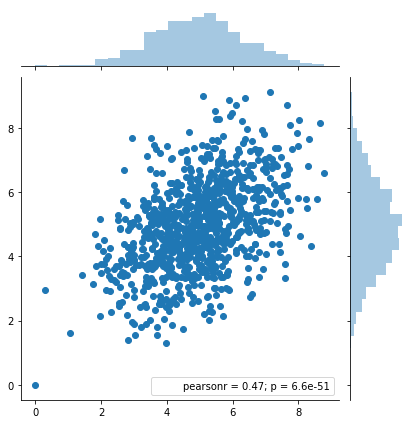

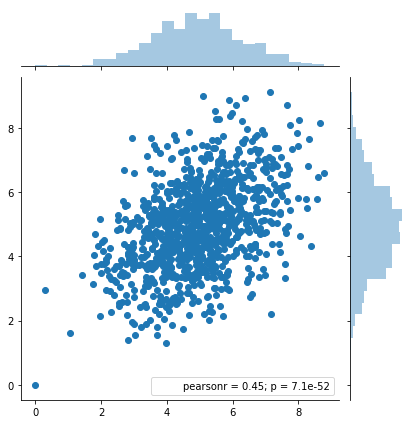

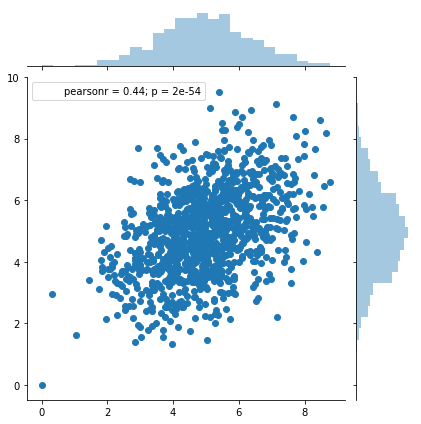

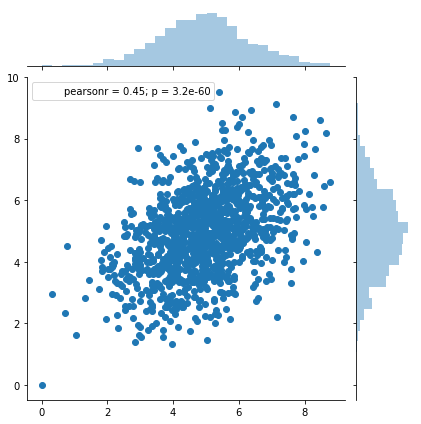

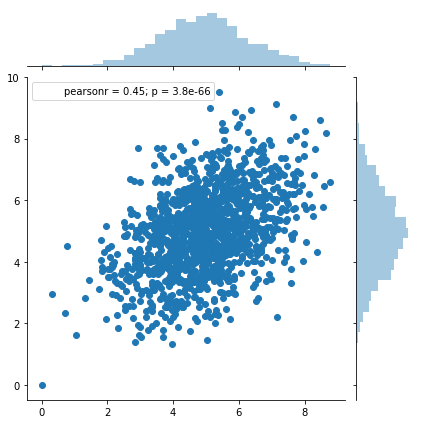

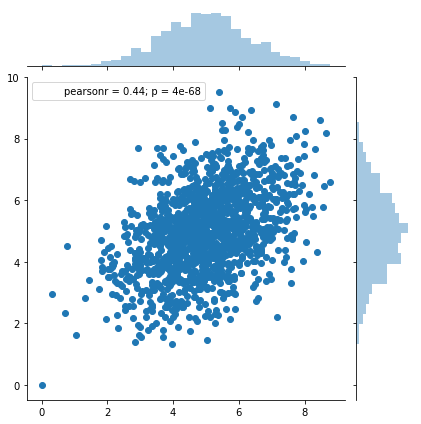

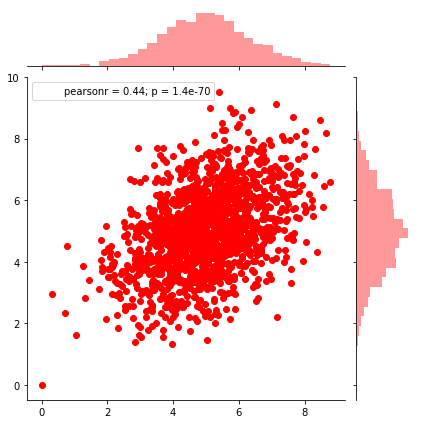

In [167]:
import numpy as np
import seaborn as sns


def p_x_given_y(y, mus, sigmas):
    mu = mus[0] + sigmas[1, 0] / sigmas[0, 0] * (y - mus[1])
    sigma = sigmas[0, 0] - sigmas[1, 0] / sigmas[1, 1] * sigmas[1, 0]
    return np.random.normal(mu, sigma)


def p_y_given_x(x, mus, sigmas):
    mu = mus[1] + sigmas[0, 1] / sigmas[1, 1] * (x - mus[0])
    sigma = sigmas[1, 1] - sigmas[0, 1] / sigmas[0, 0] * sigmas[0, 1]
    return np.random.normal(mu, sigma)


def gibbs_sampling(mus, sigmas, prevy,iter=100):
    samples = np.zeros((iter, 2))
    y = prevy

    for i in range(iter):
        x = p_x_given_y(y, mus, sigmas)
        y = p_y_given_x(x, mus, sigmas)
        samples[i, :] = [x, y]

    return samples



mus = np.array([5, 5])
sigmas = np.array([[1, 0.9], [0.8, 2]])
totsamples=np.zeros([1,2])

for j in range(15):
    samples = gibbs_sampling(mus, sigmas,totsamples[-1,1])
    totsamples=np.concatenate((totsamples,samples),axis=0)
    
    if j==14:
        fig=sns.jointplot(totsamples[:, 0], totsamples[:, 1],color="R")
    else:
        fig=sns.jointplot(totsamples[:, 0], totsamples[:, 1])
    
    fig=draw()
    plt.show()
    